In [2]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
pd.set_option('display.max_columns',50)

In [4]:
from dotenv import load_dotenv
import os
load_dotenv() 
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
database = os.getenv("DB_NAME")

In [5]:
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")
query ="select * from ppm;"
df = pd.read_sql(query, engine)

In [6]:
df.head()

,Date,Shift,Part_No,Production,Screen_Overlap_F,Dent_F,Poor_Paintwork_F,Screen_Fail_F,Dv_Damage_F,Dv_Wire_Cut_F,Element_Miss_R,Seam_Leak_F,Crimp_Nut_Leak_F,Casting_Leak_R,Bleed_Screw_Leak_R,Adaptor_Leak_R,Dv_Body_Leak_F,Dv_Oring_Leak_F,F_Damage_P,F_Paint_Fail_P,Reed_Fail_P,Head_Sealing_Damage_R,Gauge_Fail_R,Mounting_Adaptor_Fail_R,Heater_Leak_R,Head_Fail_P,F_Gasket_Cut_F,Od_Fail_R,Sealing_Leak_R,Sealing_Fail_P,F_Nutplate_Wrong_F,Nogo_Fail_R,Scratch_On_Sealing_P,Wrong_Filter_F,Wrong_Head_R,Dv_Fitment_Fail_F,Dv_Loose_F,Without_PPI_Inspection_P,Dv_Torque_Marking_Miss_F,Washer_Sealing_Leak_P,Connector_Damage_P,Washer_Sealing_R,Adaptor_Damage_P,Hpp_Pump_Fail_R,F_Scratch_Mark_P
0,2024-07-02,I,8539665,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2024-07-02,I,8059201,300,0,1,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2024-07-02,I,8185559,90,0,6,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2024-07-02,I,8567029,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2024-07-02,I,5046557,90,0,0,56,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

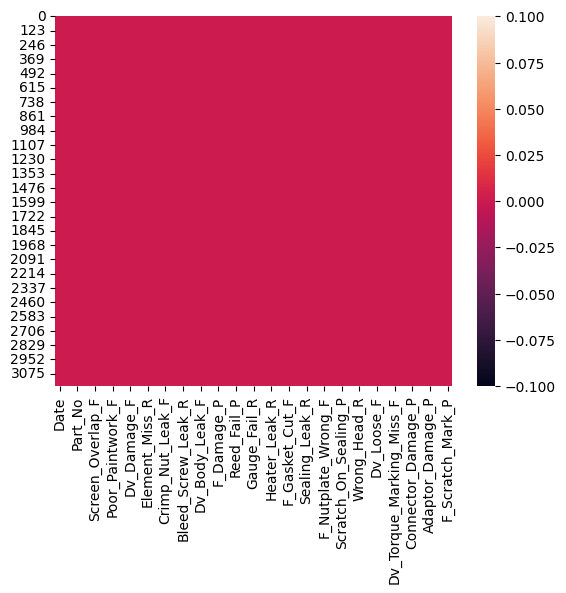

In [7]:
sn.heatmap(df.isnull())

In [8]:
prod_df = df.iloc[:,0:4]

In [9]:
prod_df['Month'] = prod_df['Date'].dt.month

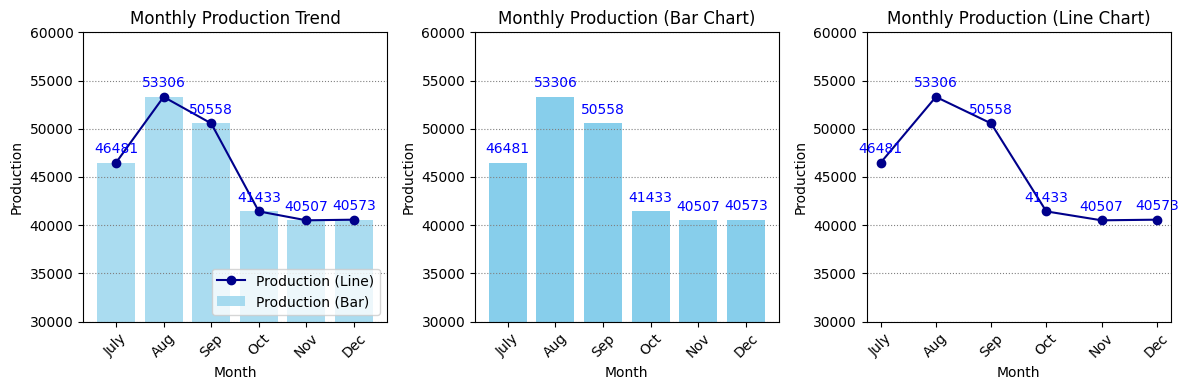

<Figure size 640x480 with 0 Axes>

In [10]:
# Grouping and plotting
monthly_prod = prod_df.groupby(['Month'])['Production'].sum()
xlabels = ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']



# fig, ax = plt.subplots(figsize=(6, 4))
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot bar chart
axs[0].bar(monthly_prod.index, monthly_prod.values, label='Production (Bar)', color='skyblue', alpha=0.7)

# Plot line chart on top
axs[0].plot(monthly_prod.index, monthly_prod.values, marker='o', color='darkblue', label='Production (Line)')

# Axis settings
axs[0].set_xticks(monthly_prod.index)
axs[0].set_xticklabels(xlabels, rotation=45)
axs[0].set_ylim(30000, 60000)
axs[0].set_title("Monthly Production Trend")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Production")
axs[0].grid(color='grey', linestyle=':', axis='y')
axs[0].legend(loc='lower right')

# Add value labels (you can do for either or both)
for i in range(len(monthly_prod)):
    axs[0].text(monthly_prod.index[i],
            monthly_prod.values[i] + 700,
            str(monthly_prod.values[i]),
            ha='center',
            va='bottom',
            fontsize=10,
            color='blue')


#axs[1]
axs[1].set_xticks(monthly_prod.index)
axs[1].bar(monthly_prod.index, monthly_prod.values, color='skyblue')
axs[1].set_xticklabels(xlabels, rotation=45)
axs[1].set_ylim(30000, 60000)
axs[1].set_title("Monthly Production (Bar Chart)")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Production")
axs[1].grid(color='grey', linestyle=':', axis='y')

# Add value labels on bars
for i in range(len(monthly_prod)):
    axs[1].text(monthly_prod.index[i], monthly_prod.values[i] + 700, str(monthly_prod.values[i]), 
             ha='center', va='bottom', fontsize=10, color='blue')
    

#axs2
# Line chart on the second subplot
axs[2].plot(monthly_prod.index, monthly_prod.values, marker='o', color='darkblue')
axs[2].set_xticks(monthly_prod.index)
axs[2].set_xticklabels(xlabels, rotation=45)
axs[2].set_ylim(30000, 60000)
axs[2].set_title("Monthly Production (Line Chart)")
axs[2].set_xlabel("Month")
axs[2].set_ylabel("Production")
axs[2].grid(color='grey', linestyle=':', axis='y')

# Add value labels on points
for i in range(len(monthly_prod)):
    axs[2].text(monthly_prod.index[i], monthly_prod.values[i] + 700, str(monthly_prod.values[i]),
             ha='center', va='bottom', fontsize=10, color='blue')

plt.tight_layout()
plt.show()





plt.tight_layout()
plt.show()


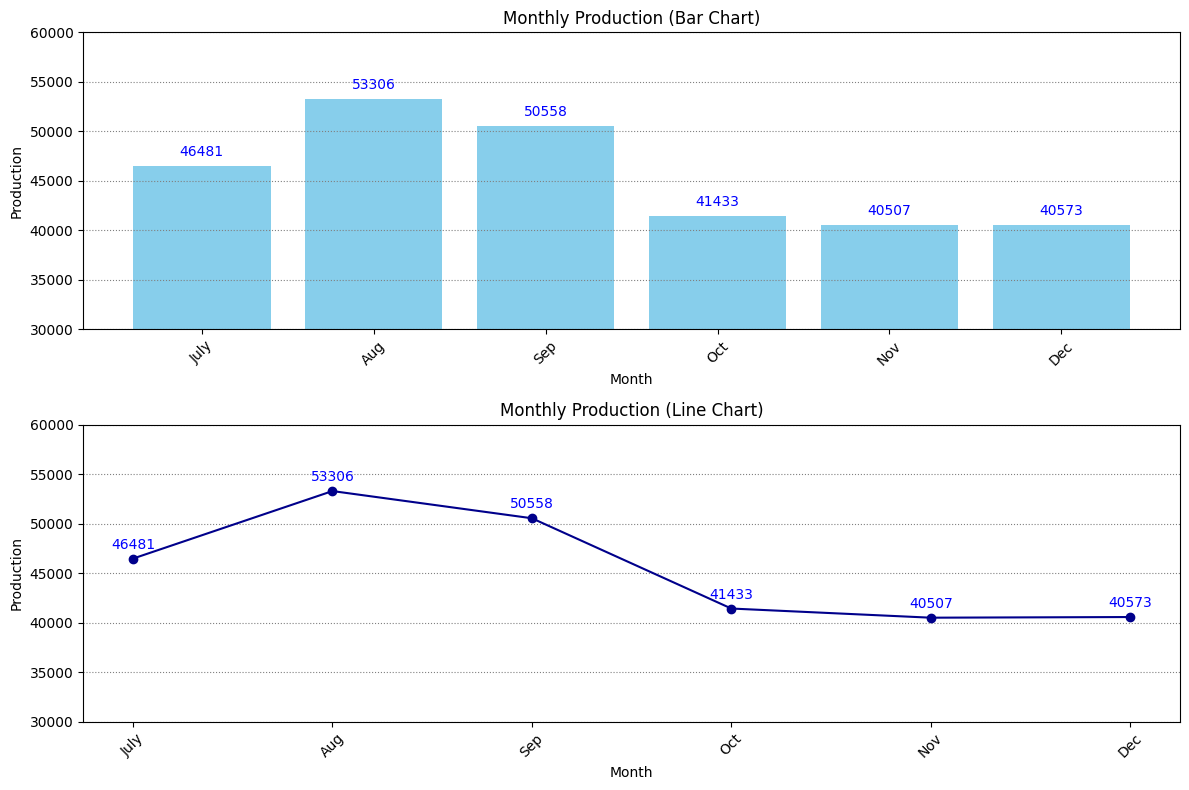

In [11]:
monthly_prod = prod_df.groupby(['Month'])['Production'].sum()
xlabels = ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))  # 1 row, 2 columns

# Bar chart on the first subplot
ax1.bar(monthly_prod.index, monthly_prod.values, color='skyblue')
ax1.set_xticks(monthly_prod.index)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_ylim(30000, 60000)
ax1.set_title("Monthly Production (Bar Chart)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Production")
ax1.grid(color='grey', linestyle=':', axis='y')

# Add value labels on bars
for i in range(len(monthly_prod)):
    ax1.text(monthly_prod.index[i], monthly_prod.values[i] + 700, str(monthly_prod.values[i]), 
             ha='center', va='bottom', fontsize=10, color='blue')

# Line chart on the second subplot
ax2.plot(monthly_prod.index, monthly_prod.values, marker='o', color='darkblue')
ax2.set_xticks(monthly_prod.index)
ax2.set_xticklabels(xlabels, rotation=45)
ax2.set_ylim(30000, 60000)
ax2.set_title("Monthly Production (Line Chart)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Production")
ax2.grid(color='grey', linestyle=':', axis='y')

# Add value labels on points
for i in range(len(monthly_prod)):
    ax2.text(monthly_prod.index[i], monthly_prod.values[i] + 700, str(monthly_prod.values[i]),
             ha='center', va='bottom', fontsize=10, color='blue')

plt.tight_layout()
plt.show()


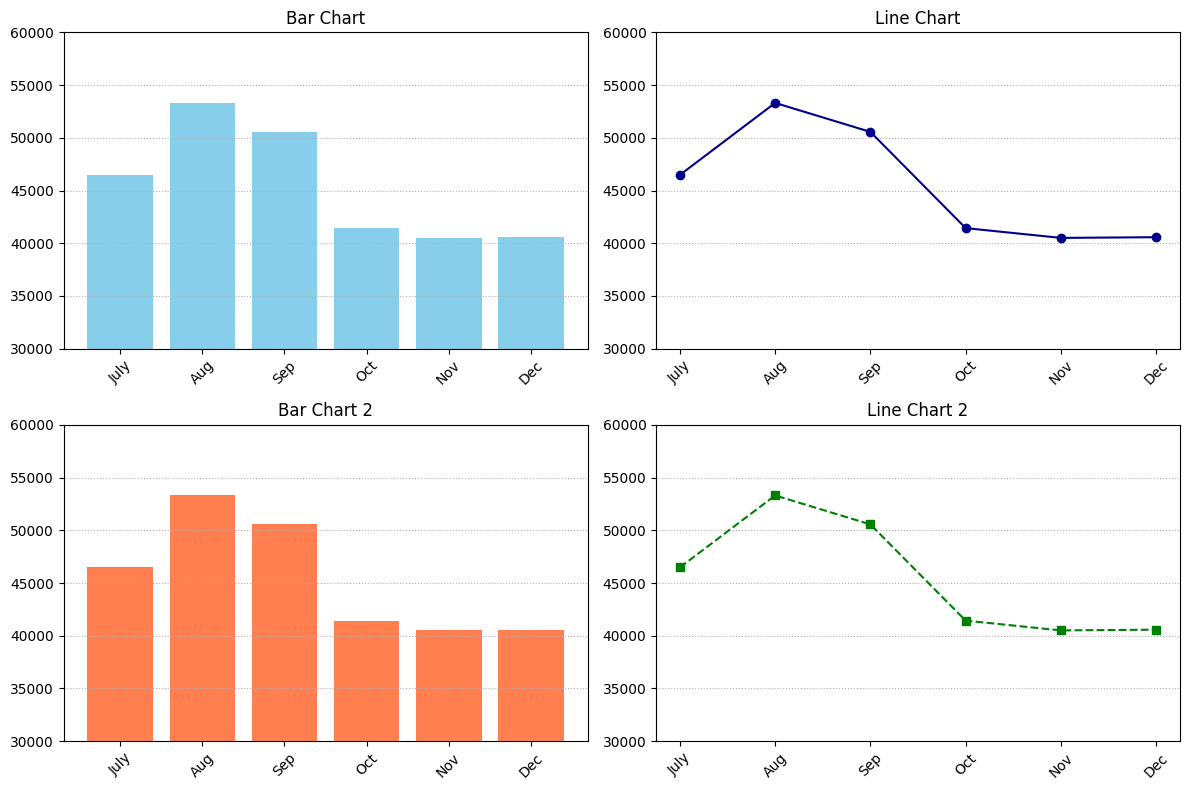

In [12]:
monthly_prod = prod_df.groupby(['Month'])['Production'].sum()
xlabels = ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Flatten axs for easy indexing
axs = axs.flatten()

# Plot 1: Bar chart
axs[0].bar(monthly_prod.index, monthly_prod.values, color='skyblue')
axs[0].set_xticks(monthly_prod.index)
axs[0].set_xticklabels(xlabels, rotation=45)
axs[0].set_title("Bar Chart")
axs[0].set_ylim(30000, 60000)
axs[0].grid(axis='y', linestyle=':')

# Plot 2: Line chart
axs[1].plot(monthly_prod.index, monthly_prod.values, marker='o', color='darkblue')
axs[1].set_xticks(monthly_prod.index)
axs[1].set_xticklabels(xlabels, rotation=45)
axs[1].set_title("Line Chart")
axs[1].set_ylim(30000, 60000)
axs[1].grid(axis='y', linestyle=':')

# Plot 3: Another bar chart with different color
axs[2].bar(monthly_prod.index, monthly_prod.values, color='coral')
axs[2].set_xticks(monthly_prod.index)
axs[2].set_xticklabels(xlabels, rotation=45)
axs[2].set_title("Bar Chart 2")
axs[2].set_ylim(30000, 60000)
axs[2].grid(axis='y', linestyle=':')

# Plot 4: Another line chart with dashed line
axs[3].plot(monthly_prod.index, monthly_prod.values, marker='s', linestyle='--', color='green')
axs[3].set_xticks(monthly_prod.index)
axs[3].set_xticklabels(xlabels, rotation=45)
axs[3].set_title("Line Chart 2")
axs[3].set_ylim(30000, 60000)
axs[3].grid(axis='y', linestyle=':')

# Add a tight layout to avoid overlap
plt.tight_layout()
plt.show()


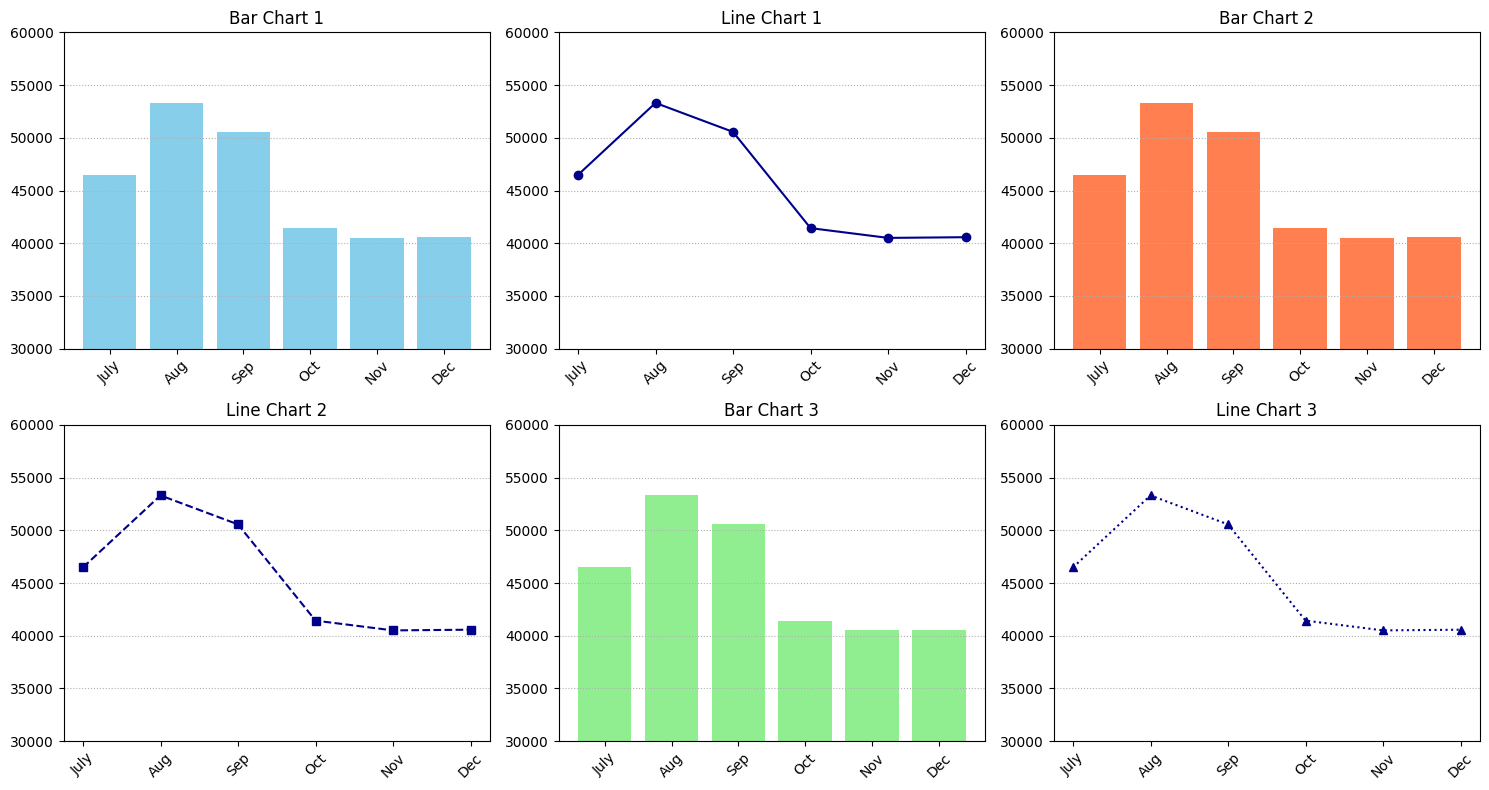

In [13]:
monthly_prod = prod_df.groupby(['Month'])['Production'].sum()
xlabels = ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns
axs = axs.flatten()  # Flatten to easily iterate

for i in range(6):
    if i % 2 == 0:
        # Even index: bar chart with different colors
        color = ['skyblue', 'coral', 'lightgreen'][i//2 % 3]
        axs[i].bar(monthly_prod.index, monthly_prod.values, color=color)
        axs[i].set_title(f"Bar Chart {i//2 + 1}")
    else:
        # Odd index: line chart with different markers and styles
        markers = ['o', 's', '^']
        linestyles = ['-', '--', ':']
        axs[i].plot(monthly_prod.index, monthly_prod.values, marker=markers[i//2], linestyle=linestyles[i//2], color='darkblue')
        axs[i].set_title(f"Line Chart {i//2 + 1}")

    axs[i].set_xticks(monthly_prod.index)
    axs[i].set_xticklabels(xlabels, rotation=45)
    axs[i].set_ylim(30000, 60000)
    axs[i].grid(axis='y', linestyle=':')

plt.tight_layout()
plt.show()


<BarContainer object of 10 artists>

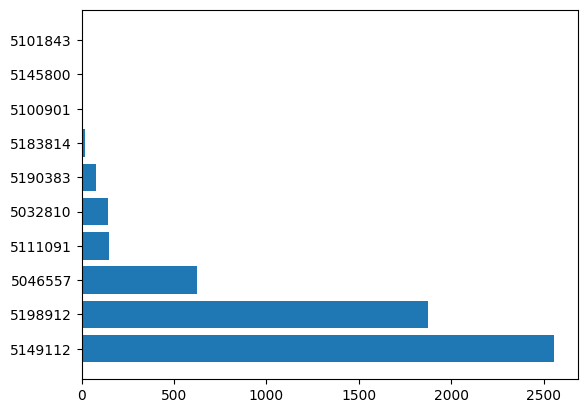

In [14]:
partwise_pro_count =  prod_df.groupby('Part_No')['Production'].sum().head(10)
partwise_pro_count = partwise_pro_count.sort_values(ascending=False)

plt.barh(partwise_pro_count.index,partwise_pro_count.values)



In [15]:
prod_df[prod_df['Part_No'].isin(['8059201'])].describe()



,Date,Production,Month
count,216,216.00000,216.000000
mean,2024-09-26 01:20:00,182.87037,9.328704
min,2024-07-02 00:00:00,1.00000,7.000000
25%,2024-08-12 00:00:00,112.50000,8.000000
50%,2024-09-17 00:00:00,177.00000,9.000000
75%,2024-11-12 12:00:00,240.00000,11.000000
max,2024-12-30 00:00:00,480.00000,12.000000
std,NaN,97.12606,1.703160


In [16]:
prod_df.groupby('Month')['Production'].sum().describe()

count        6.000000
mean     45476.333333
std       5535.736037
min      40507.000000
25%      40788.000000
50%      43957.000000
75%      49538.750000
max      53306.000000
Name: Production, dtype: float64

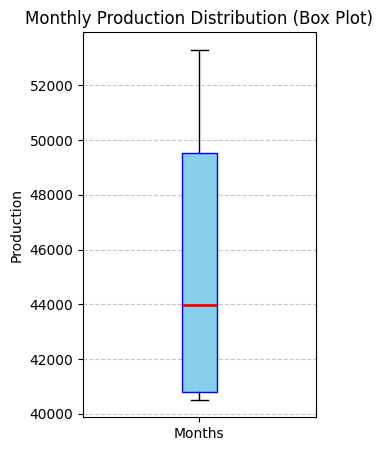

In [17]:
monthly_prod = prod_df.groupby('Month')['Production'].sum()

plt.figure(figsize=(3, 5))
plt.boxplot(monthly_prod, vert=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red', linewidth=2))

plt.title('Monthly Production Distribution (Box Plot)')
plt.ylabel('Production')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([1], ['Months'])

plt.show()

Shift
I     182498
II     90360
Name: Production, dtype: int64


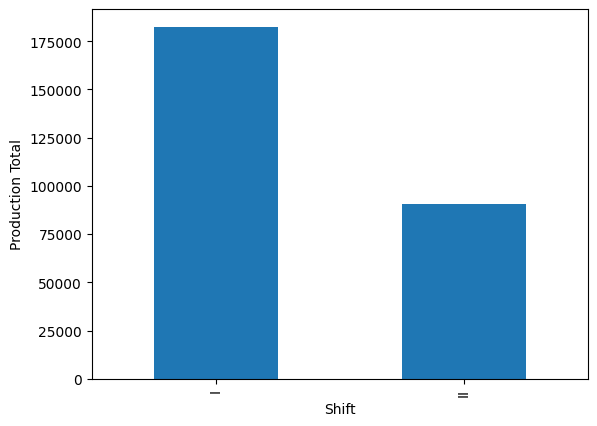

In [18]:
prod_df.groupby('Shift')['Production'].sum().plot(kind='bar')
plt.xlabel('Shift')
plt.ylabel('Production Total')
print(prod_df.groupby('Shift')['Production'].sum())

In [ ]:
#to check how it this query works
prod_df.loc[:10,'Shift':'Production']

In [ ]:
#creating group by for pivoting months to column
group_prod_df= prod_df.groupby(['Month','Part_No'])['Production'].sum().reset_index().sort_values(by=['Month','Production'],ascending=[True,False]).reset_index(drop=True)

In [ ]:
#pivoting column months to rows
Top5_prod=group_prod_df.pivot(index='Part_No',columns='Month',values='Production').fillna(0).sort_values(by=[7,8,9,10,11,12],ascending=False)

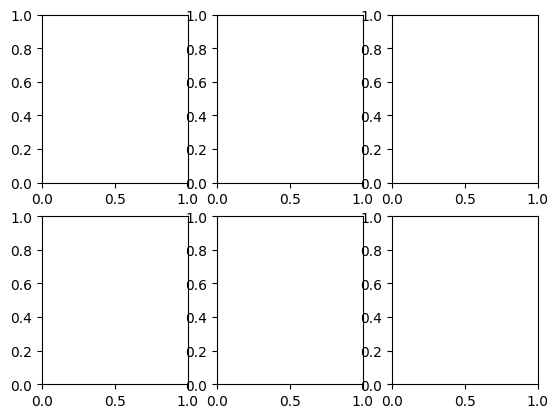

In [ ]:
#top 5 highest produce parts in month
top5_7 = Top5_prod[7].sort_values(ascending=False).head(5)
top5_8 = Top5_prod[8].sort_values(ascending=False).head(5)
top5_9 = Top5_prod[9].sort_values(ascending=False).head(5)
top5_10 = Top5_prod[10].sort_values(ascending=False).head(5)
top5_11 = Top5_prod[11].sort_values(ascending=False).head(5)
top5_12 = Top5_prod[12].sort_values(ascending=False).head(5)



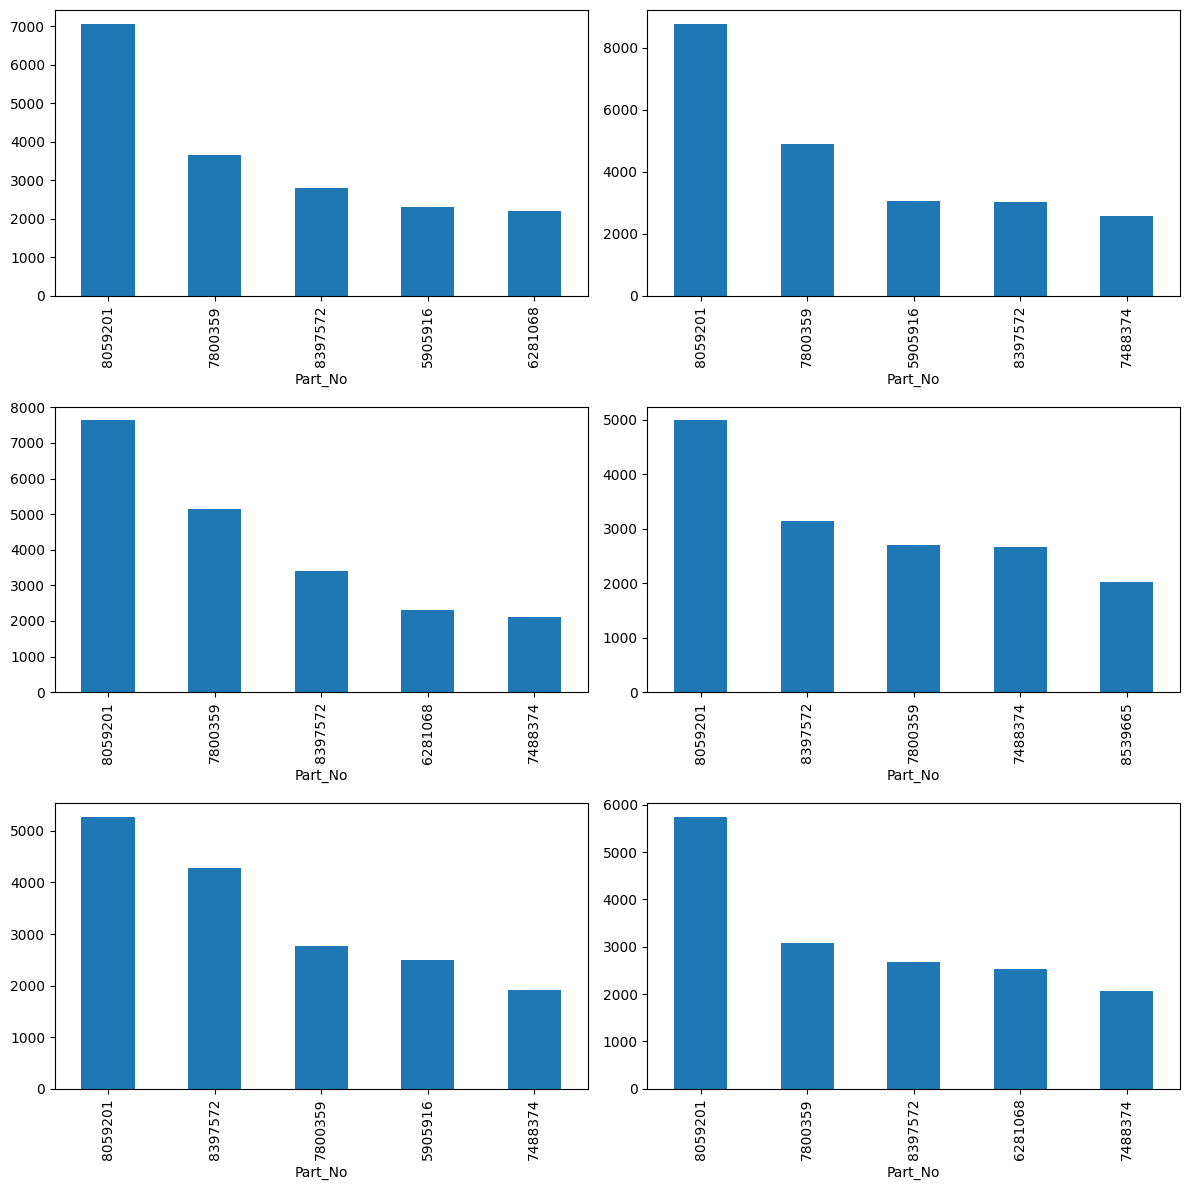

In [136]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
ax = ax.flatten()  # Convert 2D array of axes into 1D array

top5_7.plot(kind='bar', ax=ax[0])
top5_8.plot(kind='bar', ax=ax[1])
top5_9.plot(kind='bar', ax=ax[2])
top5_10.plot(kind='bar', ax=ax[3])
top5_11.plot(kind='bar', ax=ax[4])
top5_12.plot(kind='bar', ax=ax[5])

plt.tight_layout()
plt.show()


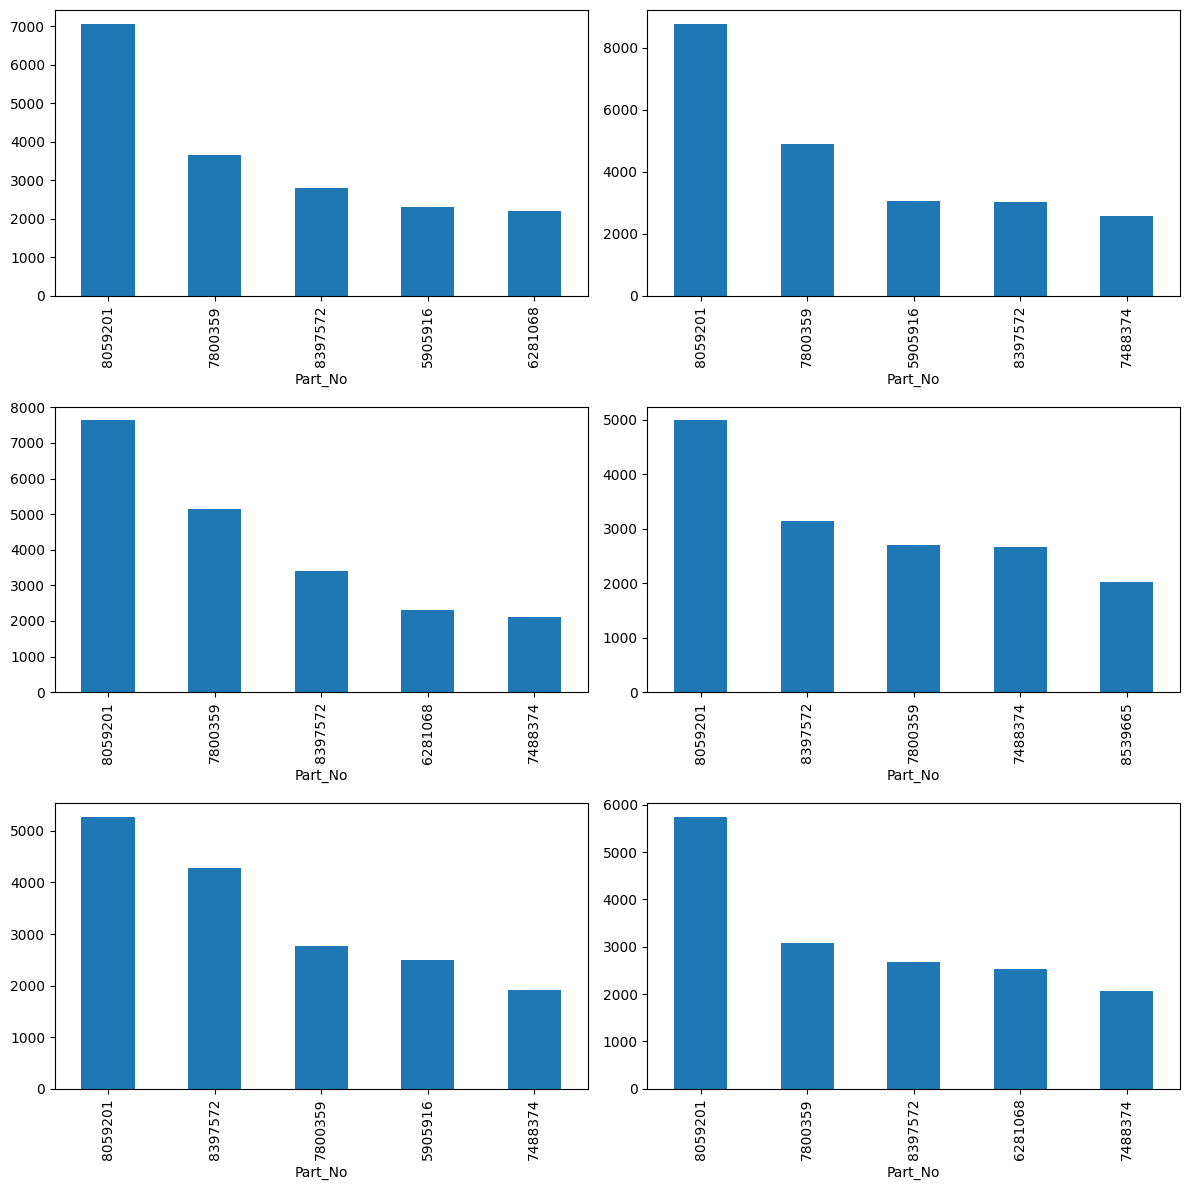

In [130]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
ax = ax.flatten()

top5_list = [top5_7, top5_8, top5_9, top5_10, top5_11, top5_12]

for i, data in enumerate(top5_list):
    data.plot(kind='bar', ax=ax[i])

plt.tight_layout()
plt.show()


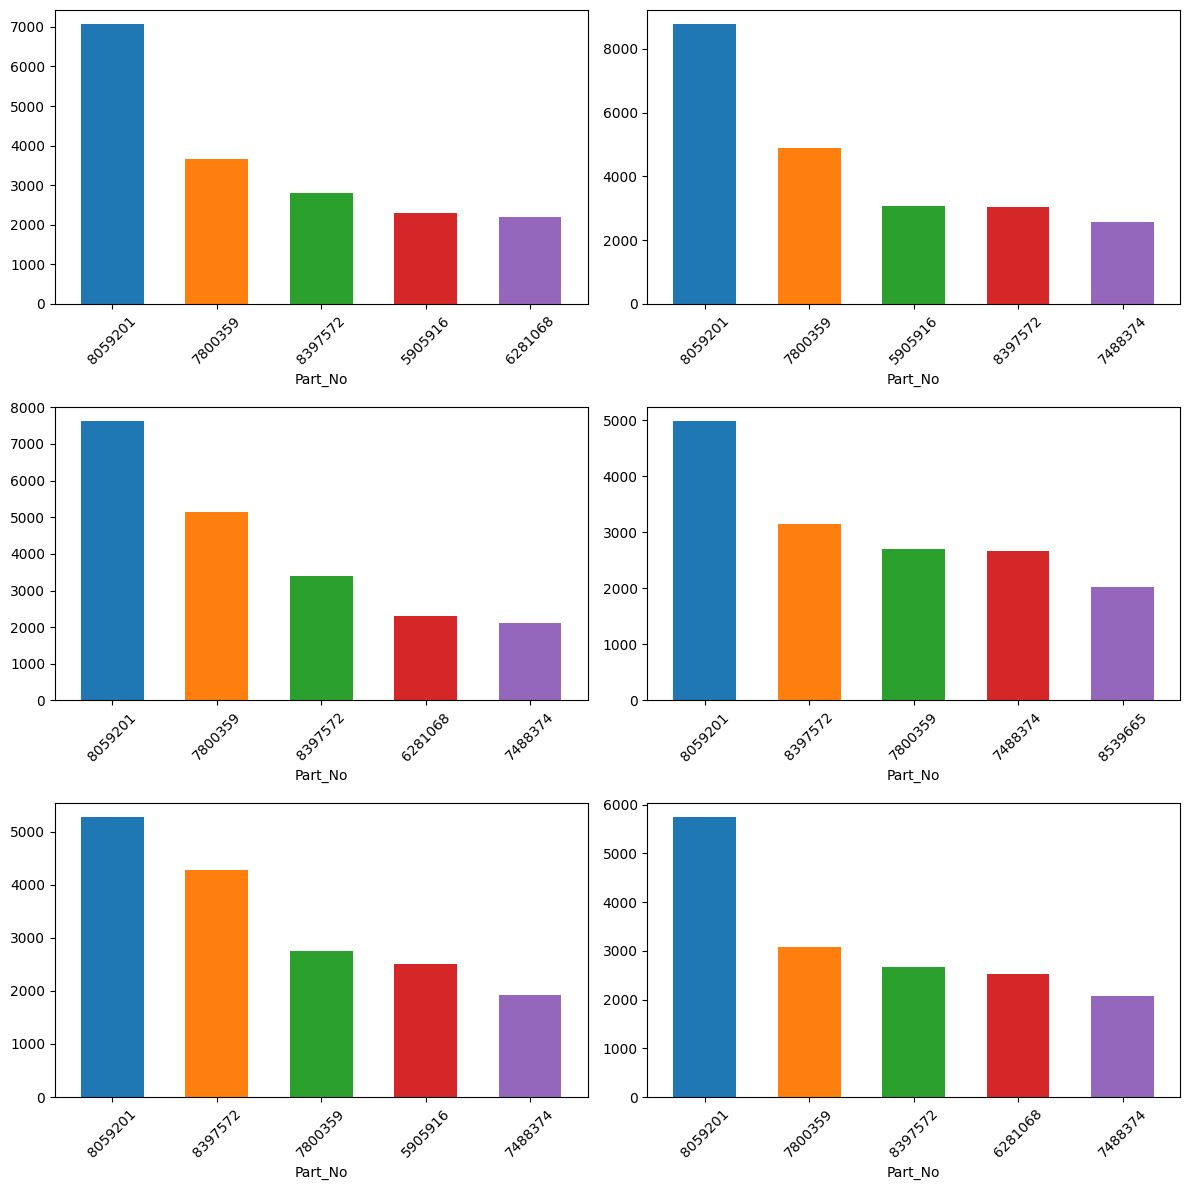

In [137]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
ax = ax.flatten()

# Optional: Define your custom color palette (repeats if fewer than bars)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Decrease bar width = increase spacing between bars
top5_7.plot(kind='bar', ax=ax[0], width=0.6, color=colors)
top5_8.plot(kind='bar', ax=ax[1], width=0.6, color=colors)
top5_9.plot(kind='bar', ax=ax[2], width=0.6, color=colors)
top5_10.plot(kind='bar', ax=ax[3], width=0.6, color=colors)
top5_11.plot(kind='bar', ax=ax[4], width=0.6, color=colors)
top5_12.plot(kind='bar', ax=ax[5], width=0.6, color=colors)

# Optional: Rotate labels for readability
for a in ax:
    a.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()
